In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import norm
from   scipy.stats               import ttest_1samp, ttest_ind
import copy
import os
sns.set()
os.getcwd()

'C:\\Users\\suloc'

# Wholesale customer data

### A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

## Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [2]:
df = pd.read_csv('Wholesale+Customers+Data.csv')

In [3]:
df

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125


In [4]:
df.shape

(440, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [6]:
df.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [7]:
df.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,NaN,NaN,NaN,220.5,127.161315,1.0,110.75,220.5,330.25,440.0
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440.0,NaN,NaN,NaN,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,NaN,NaN,NaN,5796.265909,7380.377175,55.0,1533.0,3627.0,7190.25,73498.0
Grocery,440.0,NaN,NaN,NaN,7951.277273,9503.162829,3.0,2153.0,4755.5,10655.75,92780.0
Frozen,440.0,NaN,NaN,NaN,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,NaN,NaN,NaN,2881.493182,4767.854448,3.0,256.75,816.5,3922.0,40827.0
Delicatessen,440.0,NaN,NaN,NaN,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [9]:
df['Total price'] = df['Fresh'] + df['Milk'] +df['Grocery']+df['Frozen']+df['Detergents_Paper']+df['Delicatessen']
df

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total price
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,17834


In [10]:
df

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total price
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,17834


## There are 6 different varieties of items that are considered.

In [11]:
df.groupby('Region').sum()['Total price'].sort_values(ascending=False)

C:\Users\suloc\AppData\Local\Temp\ipykernel_2896\3739681714.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Region').sum()['Total price'].sort_values(ascending=False)


Region
Other     10677599
Lisbon     2386813
Oporto     1555088
Name: Total price, dtype: int64

C:\Users\suloc\AppData\Local\Temp\ipykernel_2896\3202757311.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Region').sum()['Total price'].sort_values(ascending=False).plot (kind='bar');


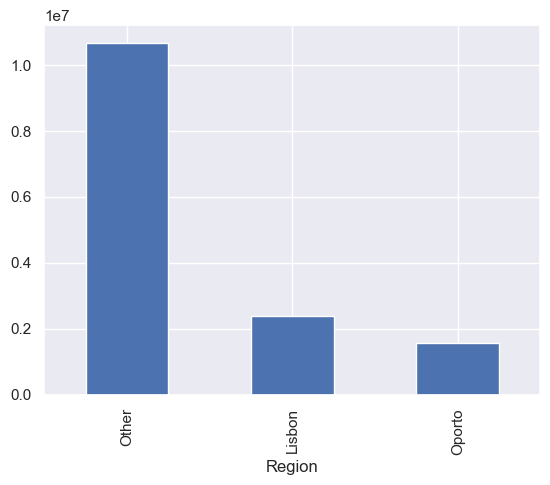

In [12]:
df.groupby('Region').sum()['Total price'].sort_values(ascending=False).plot (kind='bar');

In [13]:
df.groupby('Region').sum()['Total price'].sort_values(ascending=True)

C:\Users\suloc\AppData\Local\Temp\ipykernel_2896\153469305.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Region').sum()['Total price'].sort_values(ascending=True)


Region
Oporto     1555088
Lisbon     2386813
Other     10677599
Name: Total price, dtype: int64

C:\Users\suloc\AppData\Local\Temp\ipykernel_2896\2959883240.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Region').sum()['Total price'].sort_values(ascending=True).plot (kind='bar');


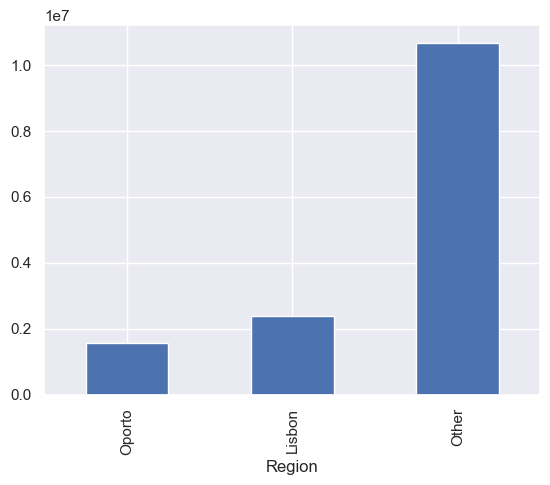

In [14]:
df.groupby('Region').sum()['Total price'].sort_values(ascending=True).plot (kind='bar');

In [15]:
df.groupby('Channel').sum()['Total price'].sort_values(ascending=False)

C:\Users\suloc\AppData\Local\Temp\ipykernel_2896\1379235521.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Channel').sum()['Total price'].sort_values(ascending=False)


Channel
Hotel     7999569
Retail    6619931
Name: Total price, dtype: int64

C:\Users\suloc\AppData\Local\Temp\ipykernel_2896\2692507471.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Channel').sum()['Total price'].sort_values(ascending=False).plot(kind = 'bar');


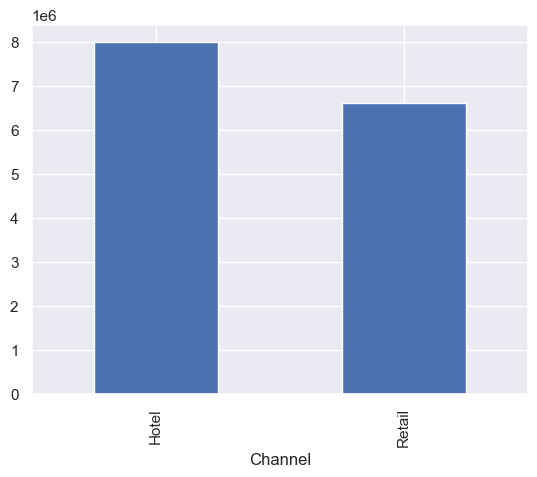

In [16]:
df.groupby('Channel').sum()['Total price'].sort_values(ascending=False).plot(kind = 'bar');

In [17]:
df.groupby('Channel').sum()['Total price'].sort_values(ascending=True)

C:\Users\suloc\AppData\Local\Temp\ipykernel_2896\62178357.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Channel').sum()['Total price'].sort_values(ascending=True)


Channel
Retail    6619931
Hotel     7999569
Name: Total price, dtype: int64

C:\Users\suloc\AppData\Local\Temp\ipykernel_2896\95838501.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Channel').sum()['Total price'].sort_values(ascending=True).plot(kind = 'bar');


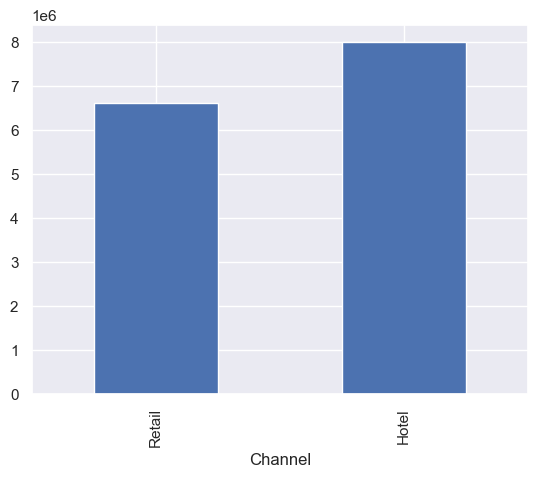

In [18]:
df.groupby('Channel').sum()['Total price'].sort_values(ascending=True).plot(kind = 'bar');

In [19]:
df1_products= pd.pivot_table(df, values=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen'], 
               index = ["Region"], aggfunc=np.sum)
df1_products.head()

,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk
Region,,,,,,
Lisbon,104327,204136,854833,231026,570037,422454
Oporto,54506,173311,464721,190132,433274,239144
Other,512110,890410,3960577,930492,2495251,1888759


In [20]:
df1_products.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Delicatessen,3.0,223647.67,251054.62,54506.0,79416.5,104327.0,308218.5,512110.0
Detergents_Paper,3.0,422619.00,405411.96,173311.0,188723.5,204136.0,547273.0,890410.0
Fresh,3.0,1760043.67,1915674.05,464721.0,659777.0,854833.0,2407705.0,3960577.0
Frozen,3.0,450550.00,416144.59,190132.0,210579.0,231026.0,580759.0,930492.0
Grocery,3.0,1166187.33,1153032.39,433274.0,501655.5,570037.0,1532644.0,2495251.0
Milk,3.0,850119.00,904146.24,239144.0,330799.0,422454.0,1155606.5,1888759.0


In [21]:
df2_products = pd.pivot_table(df, values=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen'], 
               index = ["Channel"], aggfunc=np.sum)
df2_products.head()

,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk
Channel,,,,,,
Hotel,421955,235587,4015717,1116979,1180717,1028614
Retail,248988,1032270,1264414,234671,2317845,1521743


In [22]:
df2_products.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Delicatessen,2.0,335471.5,122306.14,248988.0,292229.75,335471.5,378713.25,421955.0
Detergents_Paper,2.0,633928.5,563339.95,235587.0,434757.75,633928.5,833099.25,1032270.0
Fresh,2.0,2640065.5,1945465.01,1264414.0,1952239.75,2640065.5,3327891.25,4015717.0
Frozen,2.0,675825.0,623885.97,234671.0,455248.00,675825.0,896402.00,1116979.0
Grocery,2.0,1749281.0,804070.92,1180717.0,1464999.00,1749281.0,2033563.00,2317845.0
Milk,2.0,1275178.5,348694.86,1028614.0,1151896.25,1275178.5,1398460.75,1521743.0


In [23]:
df_products = pd.pivot_table(df, values=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen'], 
               index = ["Region","Channel"], aggfunc=np.sum)
df_products

Delicatessen  Detergents_Paper    Fresh  Frozen  Grocery  \
Region Channel                                                             
Lisbon Hotel           70632             56081   761233  184512   237542   
       Retail          33695            148055    93600   46514   332495   
Oporto Hotel           30965             13516   326215  160861   123074   
       Retail          23541            159795   138506   29271   310200   
Other  Hotel          320358            165990  2928269  771606   820101   
       Retail         191752            724420  1032308  158886  1675150   

                   Milk  
Region Channel           
Lisbon Hotel     228342  
       Retail    194112  
Oporto Hotel      64519  
       Retail    174625  
Other  Hotel     735753  
       Retail   1153006

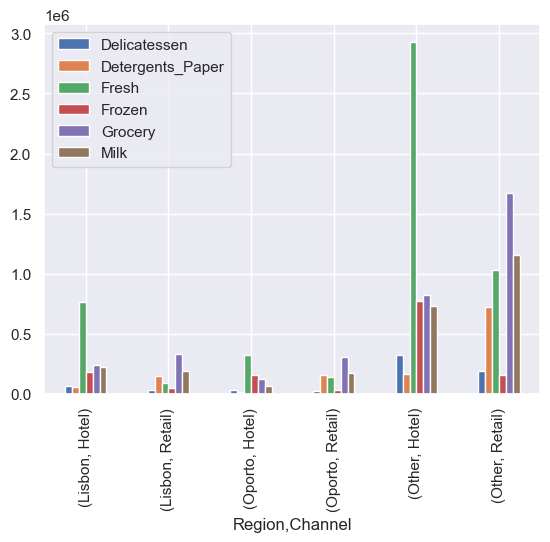

In [24]:
df_products.plot.bar();

In [25]:
df_products.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Delicatessen,6.0,111823.83,120006.58,23541.0,31647.50,52163.5,161472.00,320358.0
Detergents_Paper,6.0,211309.50,258924.42,13516.0,79074.50,153925.0,164441.25,724420.0
Fresh,6.0,880021.83,1068421.77,93600.0,185433.25,543724.0,964539.25,2928269.0
Frozen,6.0,225275.00,275343.03,29271.0,74607.00,159873.5,178599.25,771606.0
Grocery,6.0,583093.67,586012.66,123074.0,255706.50,321347.5,698199.50,1675150.0
Milk,6.0,425059.50,426890.61,64519.0,179496.75,211227.0,608900.25,1153006.0


In [26]:
df_region = df.groupby('Region',)[['Fresh','Milk', 'Grocery',
       'Frozen', 'Detergents_Paper', 'Delicatessen']]
df_region_des = df_region.describe().T.round(2)
df_region_des

Region                    Lisbon    Oporto      Other
Fresh            count     77.00     47.00     316.00
                 mean   11101.73   9887.68   12533.47
                 std    11557.44   8387.90   13389.21
                 min       18.00      3.00       3.00
                 25%     2806.00   2751.50    3350.75
                 50%     7363.00   8090.00    8752.50
                 75%    15218.00  14925.50   17406.50
                 max    56083.00  32717.00  112151.00
Milk             count     77.00     47.00     316.00
                 mean    5486.42   5088.17    5977.09
                 std     5704.86   5826.34    7935.46
                 min      258.00    333.00      55.00
                 25%     1372.00   1430.50    1634.00
                 50%     3748.00   2374.00    3684.50
                 75%     7503.00   5772.50    7198.75
                 max    28326.00  25071.00   73498.00
Grocery          count     77.00     47.00     316.00
                 mean    7403.08   9218.60    7896.36
                 std     8496.29  10842.75    9537.29
                 min      489.00   1330.00       3.00
                 25%     2046.00   2792.50    2141.50
                 50%     3838.00   6114.00    4732.00
                 75%     9490.00  11758.50   10559.75
                 max    39694.00  67298.00   92780.00
Frozen           count     77.00     47.00     316.00
                 mean    3000.34   4045.36    2944.59
                 std     3092.14   9151.78    4260.13
                 min       61.00    131.00      25.00
                 25%      950.00    811.50     664.75
                 50%     1801.00   1455.00    1498.00
                 75%     4324.00   3272.00    3354.75
                 max    18711.00  60869.00   36534.00
Detergents_Paper count     77.00     47.00     316.00
                 mean    2651.12   3687.47    2817.75
                 std     4208.46   6514.72    4593.05
                 min        5.00     15.00       3.00
                 25%      284.00    282.50     251.25
                 50%      737.00    811.00     856.00
                 75%     3593.00   4324.50    3875.75
                 max    19410.00  38102.00   40827.00
Delicatessen     count     77.00     47.00     316.00
                 mean    1354.90   1159.70    1620.60
                 std     1345.42   1050.74    3232.58
                 min        7.00     51.00       3.00
                 25%      548.00    540.50     402.00
                 50%      806.00    898.00     994.00
                 75%     1775.00   1538.50    1832.75
                 max     6854.00   5609.00   47943.00

In [27]:
df_channel = df.groupby('Channel',)[['Fresh','Milk', 'Grocery',
       'Frozen', 'Detergents_Paper', 'Delicatessen']]
df_channel_des = df_channel.describe().T.round(2)
df_channel_des

Channel                     Hotel    Retail
Fresh            count     298.00    142.00
                 mean    13475.56   8904.32
                 std     13831.69   8987.71
                 min         3.00     18.00
                 25%      4070.25   2347.75
                 50%      9581.50   5993.50
                 75%     18274.75  12229.75
                 max    112151.00  44466.00
Milk             count     298.00    142.00
                 mean     3451.72  10716.50
                 std      4352.17   9679.63
                 min        55.00    928.00
                 25%      1164.50   5938.00
                 50%      2157.00   7812.00
                 75%      4029.50  12162.75
                 max     43950.00  73498.00
Grocery          count     298.00    142.00
                 mean     3962.14  16322.85
                 std      3545.51  12267.32
                 min         3.00   2743.00
                 25%      1703.75   9245.25
                 50%      2684.00  12390.00
                 75%      5076.75  20183.50
                 max     21042.00  92780.00
Frozen           count     298.00    142.00
                 mean     3748.25   1652.61
                 std      5643.91   1812.80
                 min        25.00     33.00
                 25%       830.00    534.25
                 50%      2057.50   1081.00
                 75%      4558.75   2146.75
                 max     60869.00  11559.00
Detergents_Paper count     298.00    142.00
                 mean      790.56   7269.51
                 std      1104.09   6291.09
                 min         3.00    332.00
                 25%       183.25   3683.50
                 50%       385.50   5614.50
                 75%       899.50   8662.50
                 max      6907.00  40827.00
Delicatessen     count     298.00    142.00
                 mean     1415.96   1753.44
                 std      3147.43   1953.80
                 min         3.00      3.00
                 25%       379.00    566.75
                 50%       821.00   1350.00
                 75%      1548.00   2156.00
                 max     47943.00  16523.00

# On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [28]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.50,127.16,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.30,12647.33,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.27,7380.38,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.28,9503.16,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.93,4854.67,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.49,4767.85,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.87,2820.11,3.0,408.25,965.5,1820.25,47943.0
Total price,440.0,33226.14,26356.30,904.0,17448.75,27492.0,41307.50,199891.0


In [29]:
fresh_cv = np.std(df['Fresh'])/np.mean(df['Fresh'])
fresh_cv

1.0527196084948245

In [30]:
Milk_cv = np.mean(df['Milk'])/np.std(df['Milk'])
Milk_cv

0.7862557273451984

In [31]:
Grocery_cv = np.mean(df['Grocery'])/np.std(df['Grocery'])
Grocery_cv

0.8376504106102224

In [32]:
Frozen_cv = np.mean(df['Frozen'])/np.std(df['Frozen'])
Frozen_cv

0.6334985694545615

In [33]:
Detergents_Paper_cv = np.mean(df['Detergents_Paper'])/np.std(df['Detergents_Paper'])
Detergents_Paper_cv

0.6050464059684242

In [34]:
Delicatessen_cv = np.mean(df['Delicatessen'])/np.std(df['Delicatessen'])
Delicatessen_cv

0.5413293879868332

In [35]:
products = {'Name':['Fresh', 'Milk', 'Grocery',
       'Frozen', 'Detergents_Paper', 'Delicatessen'],'Mean':[12000.30,5796.27,7951.28,3071.93,2881.49,1524.87],
            'Std':[12647.33,7380.38,9503.16,4854.67,4767.85,2820.11]}
df=pd.DataFrame(products,columns=['Name','Mean','Std'])
df

,Name,Mean,Std
0,Fresh,12000.30,12647.33
1,Milk,5796.27,7380.38
2,Grocery,7951.28,9503.16
3,Frozen,3071.93,4854.67
4,Detergents_Paper,2881.49,4767.85
5,Delicatessen,1524.87,2820.11


In [36]:
print("CV for Fresh :",12647.33/12000.30)
print("CV for Milk :",7380.38/5796.27)
print("CV for Grocery:",9503.16/7951.28)
print("CV for Frozen :",4854.67/3071.93)
print("CV for Detergents_Paper :",4767.85/2881.49)
print("CV for Delicatessen:",2820.11/1524.87)

CV for Fresh : 1.0539178187211986
CV for Milk : 1.2732981727904324
CV for Grocery: 1.1951736072682637
CV for Frozen : 1.5803322341329393
CV for Detergents_Paper : 1.6546474219934828
CV for Delicatessen: 1.8494101136490326


# Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

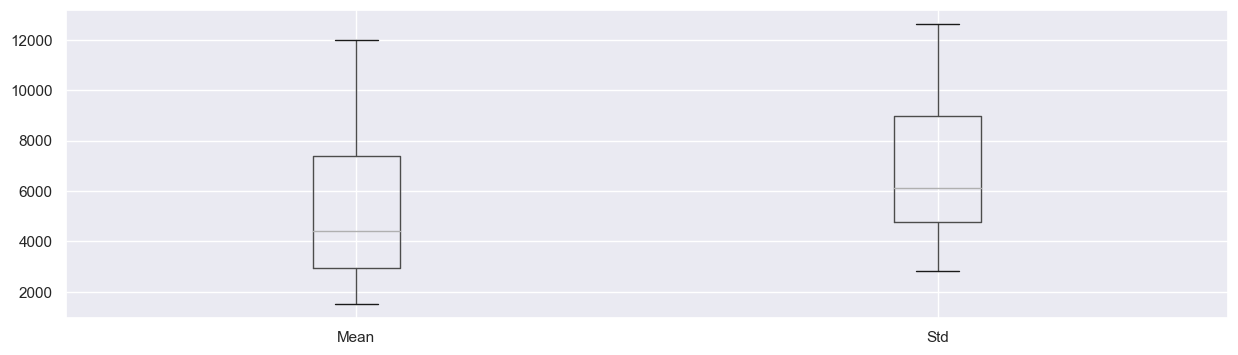

In [37]:
df.boxplot(figsize=(15,4));

# Survey data 

## For this data, construct the following contingency tables (Keep Gender as row variable)

In [39]:
survey_data = pd.read_csv('Survey-1.csv')

In [40]:
survey_data

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50


In [41]:
survey_data.shape

(62, 14)

In [42]:
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [43]:
survey_data.describe().round(2)

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00
mean,31.50,21.13,3.13,48.55,1.52,3.74,482.02,246.21
std,18.04,1.43,0.38,12.08,0.84,1.21,221.95,214.47
min,1.00,18.00,2.30,25.00,0.00,1.00,100.00,0.00
25%,16.25,20.00,2.90,40.00,1.00,3.00,312.50,100.00
50%,31.50,21.00,3.15,50.00,1.00,4.00,500.00,200.00
75%,46.75,22.00,3.40,55.00,2.00,4.00,600.00,300.00
max,62.00,26.00,3.90,80.00,4.00,6.00,1400.00,900.00


In [44]:
survey_data.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

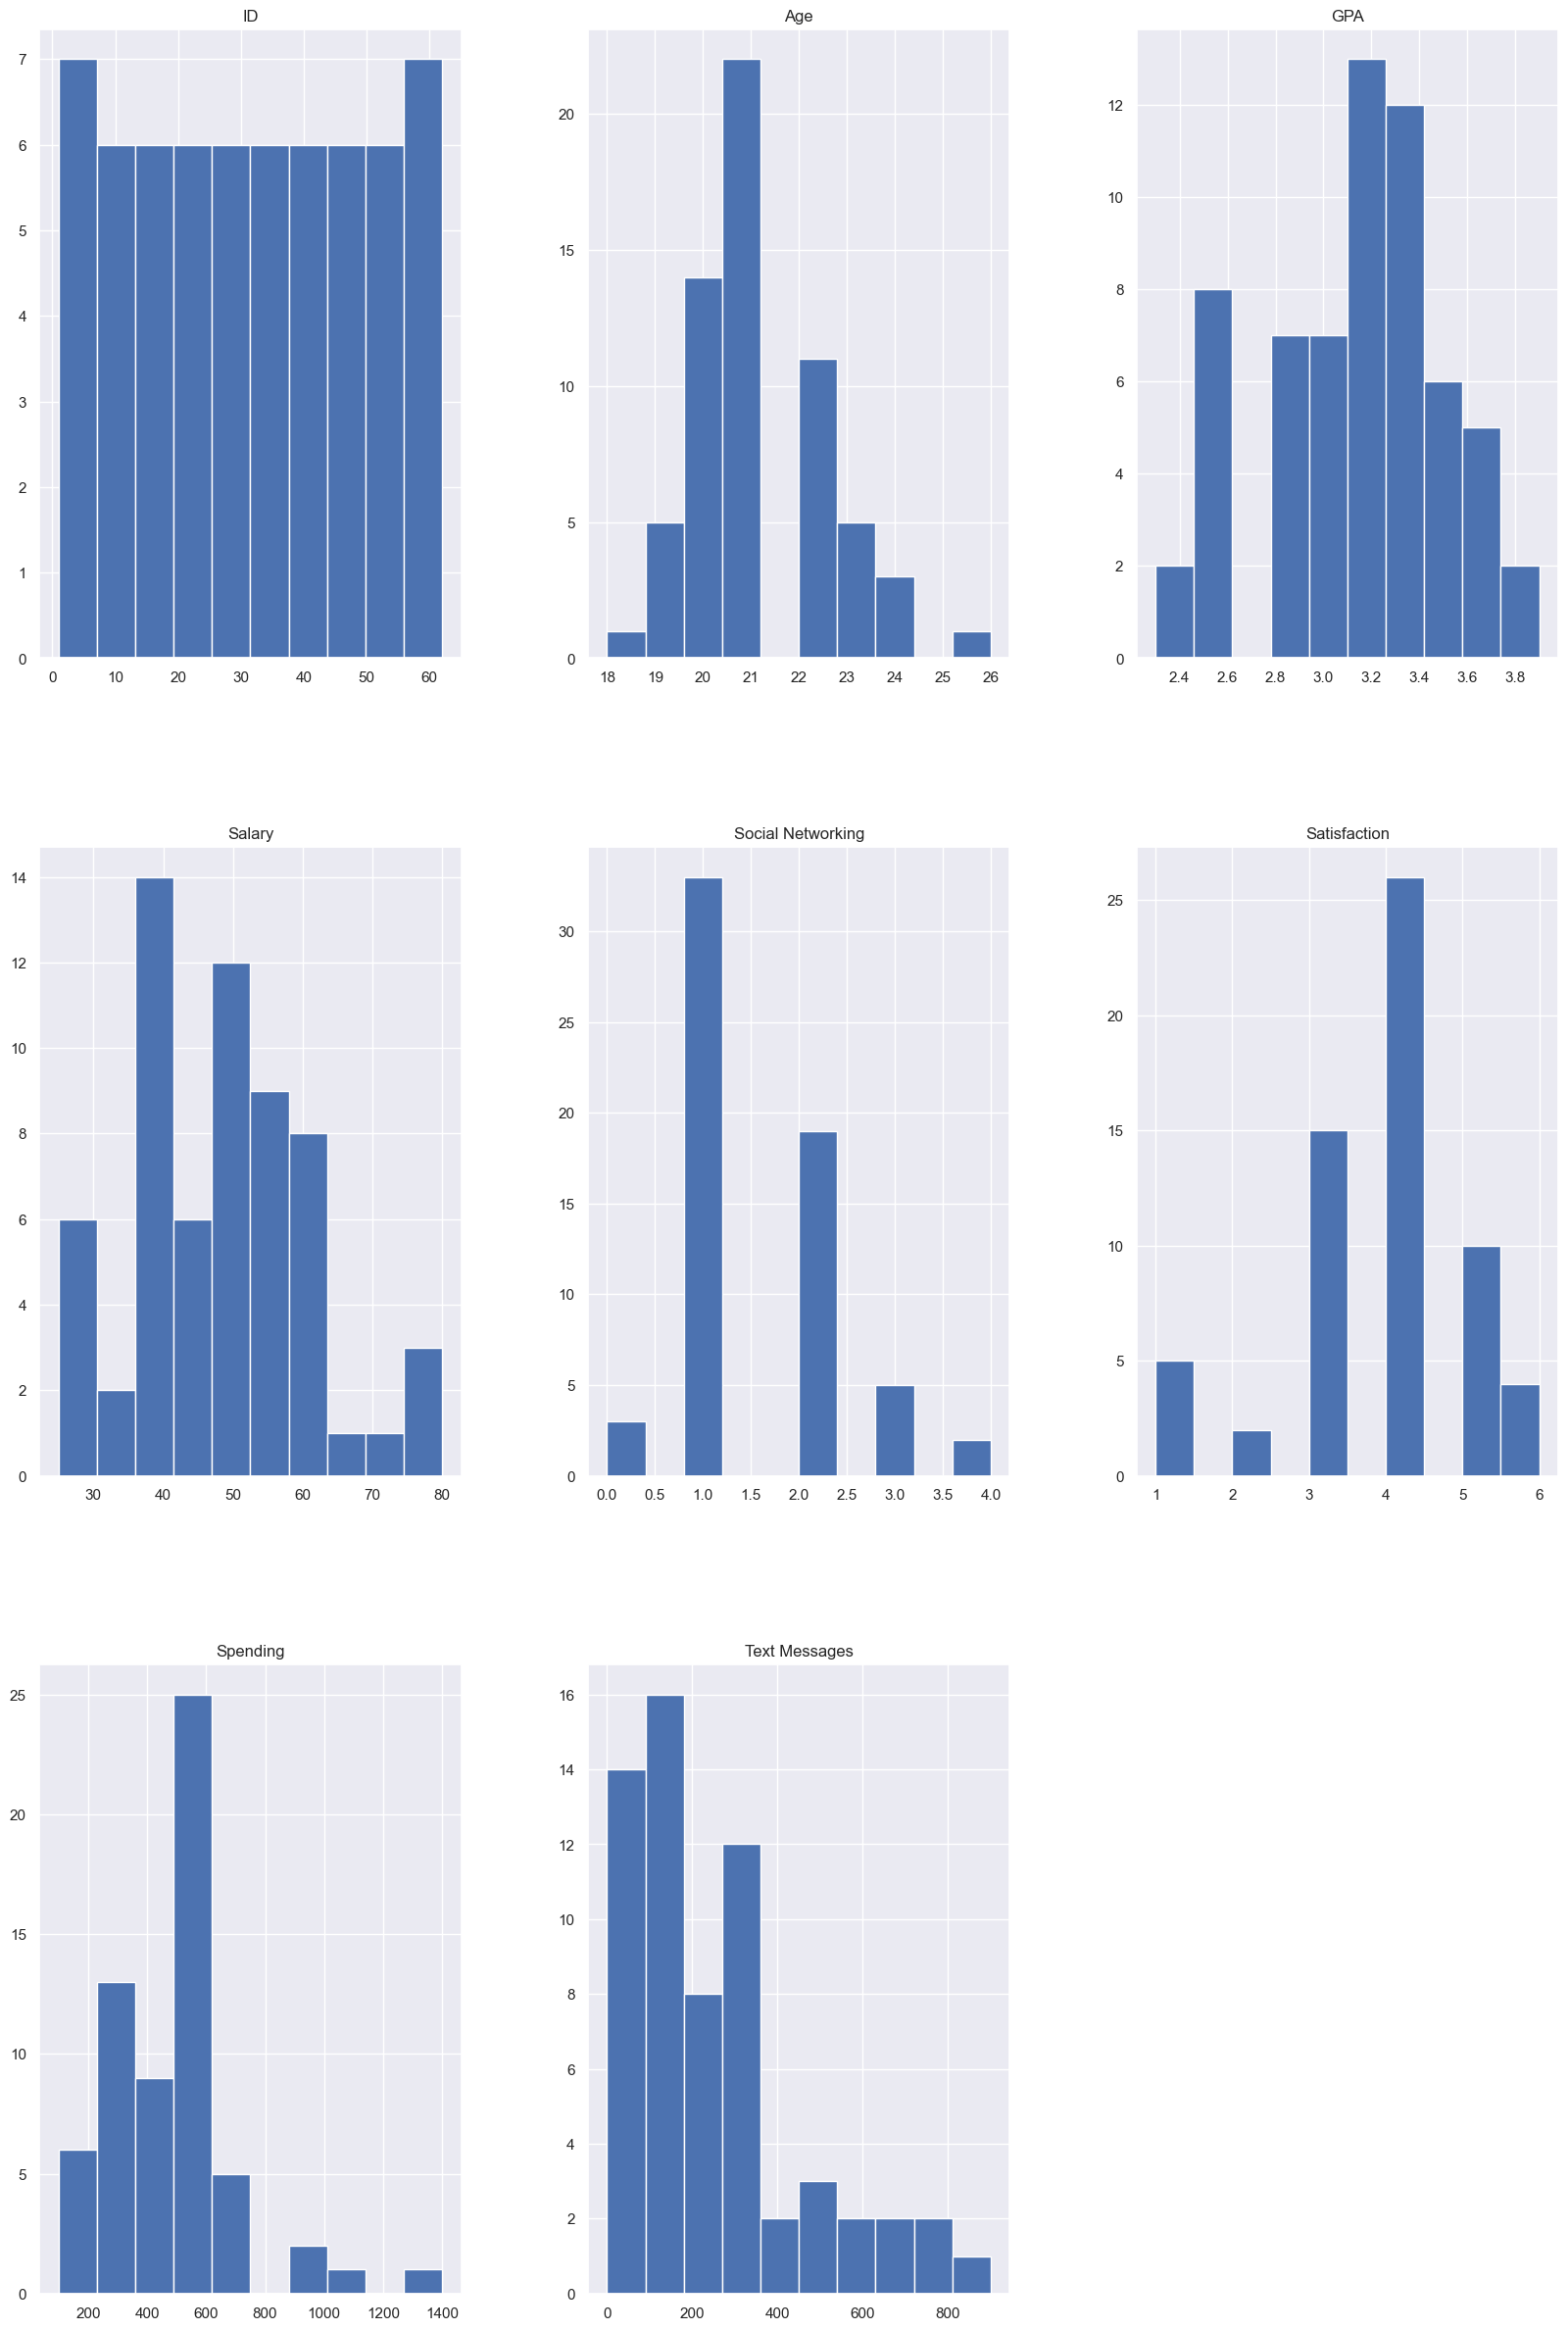

In [45]:
survey_data.hist(figsize=(20,30));

In [46]:
survey_data

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50


In [47]:
pd.crosstab(survey_data['Gender'],survey_data['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [48]:
pd.crosstab(survey_data['Gender'],survey_data['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [49]:
pd.crosstab(survey_data['Gender'],survey_data['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [50]:
pd.crosstab(survey_data['Gender'],survey_data['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


# Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:
2.2.1. What is the probability that a randomly selected CMSU student will be male?

2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [51]:
survey_data['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [52]:
print('probability that a randomly selected CMSU student will be male:',29/len(survey_data['Gender']))

probability that a randomly selected CMSU student will be male: 0.46774193548387094


In [53]:
print('probability that a randomly selected CMSU student will be female:',33/len(survey_data['Gender']))

probability that a randomly selected CMSU student will be female: 0.532258064516129


 
Find the conditional probability of different majors among the male students in CMSU.
Find the conditional probability of different majors among the female students of CMSU.

In [54]:
pd.crosstab(survey_data['Gender'],survey_data['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [55]:
print('Among the MALE students in CMSU:')
print('Probability of accounting among the male student:',4/29)
print('Probability of CIS among the male student:',1/1760)
print('Probability of economics/finance among the male student:',4/29)
print('Probability of international business among the male student:',2/29)
print('Probability of management among the male student:',6/29)
print('Probability of other among the male student:',4/29)
print('Probability of retailing/marketing among the male student:',5/29)
print('Probability of undecided among the male student:',3/29)
print()
print('Among the FEMALE students in CMSU:')
print('Probability of accounting among the female student :',3/33)
print('Probability of CIS among the female student :',3/33)
print('Probability of economics/finance among the female student:',7/33)
print('Probability of international business among the female student :',4/33)
print('Probability of management among the female student:',4/33)
print('Probability of other among the female student:',3/33)
print('Probability of retailing/marketing among the female student:',9/33)
print('Probability of undecided among the female student:',0/33)

Among the MALE students in CMSU:
Probability of accounting among the male student: 0.13793103448275862
Probability of CIS among the male student: 0.0005681818181818182
Probability of economics/finance among the male student: 0.13793103448275862
Probability of international business among the male student: 0.06896551724137931
Probability of management among the male student: 0.20689655172413793
Probability of other among the male student: 0.13793103448275862
Probability of retailing/marketing among the male student: 0.1724137931034483
Probability of undecided among the male student: 0.10344827586206896

Among the FEMALE students in CMSU:
Probability of accounting among the female student : 0.09090909090909091
Probability of CIS among the female student : 0.09090909090909091
Probability of economics/finance among the female student: 0.21212121212121213
Probability of international business among the female student : 0.12121212121212122
Probability of management among the female student: 


a)Find the probability That a randomly chosen student is a male and intends to graduate. b)Find the probability that a randomly selected student is a female and does NOT  have a laptop.

In [56]:
print("P(Grad Intention ∩ Male) = P (Grad Intention/ Male) x P (male) = ",(17/29) * (29/62))

P(Grad Intention ∩ Male) = P (Grad Intention/ Male) x P (male) =  0.27419354838709675


In [57]:
print("P(does not have a laptop ∩ Female) = P (does not have a laptop / Female) x P (Female) = ",(4/33) * (33/62))

P(does not have a laptop ∩ Female) = P (does not have a laptop / Female) x P (Female) =  0.06451612903225806


In [58]:
pd.crosstab(survey_data['Gender'],survey_data['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [59]:
survey_data['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [60]:
pd.crosstab(survey_data['Gender'],survey_data['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3



2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [61]:
print("P( Male U full-time employment) = P (Male/Total Students) + P (Full time/Total Students) - P( Male U full-time employment) = ",(29/62) + (10/62) - (7/62))

P( Male U full-time employment) = P (Male/Total Students) + P (Full time/Total Students) - P( Male U full-time employment) =  0.5161290322580645


In [62]:
survey_data['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [63]:
pd.crosstab(survey_data['Gender'],survey_data['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [64]:
 print ('p(international|total female)+p(management|total female))=',(4/33)+(4/33))

p(international|total female)+p(management|total female))= 0.24242424242424243


## Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events? 

In [65]:
survey_data.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [66]:
survey_data.rename(columns = {'Grad Intention':'Grad_Intention'}, inplace = True)
survey_data

,ID,Gender,Age,Class,Major,Grad_Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50


In [67]:
survey_subset = survey_data[['Gender', 'Grad_Intention']]
survey_sub = survey_subset[survey_subset['Grad_Intention'] != 'Undecided']
survey_sub

,Gender,Grad_Intention
0,Female,Yes
1,Male,Yes
2,Male,Yes
3,Male,Yes
8,Female,Yes
10,Female,Yes
11,Male,No
14,Male,Yes
18,Male,Yes
23,Male,Yes


In [68]:
pd.crosstab(survey_sub['Gender'],survey_sub['Grad_Intention'])

Grad_Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


In [69]:
print('P(F)P(Yes)=',(20/40)*(28/40))
print('P(F ∩ Yes)=',(11/40))

P(F)P(Yes)= 0.35
P(F ∩ Yes)= 0.275


In [70]:
survey_data

,ID,Gender,Age,Class,Major,Grad_Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50


Graduate intention and being female are not independent events.



2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [71]:
survey_data['GPA'].value_counts()

3.0    7
3.1    7
3.4    7
2.5    6
3.5    6
3.2    6
3.3    5
2.9    4
3.6    3
2.8    3
3.7    2
2.6    2
2.3    1
3.9    1
3.8    1
2.4    1
Name: GPA, dtype: int64

In [72]:
survey_gpa = survey_data[['GPA']]
survey_sub_gpa = survey_gpa[survey_gpa['GPA'] < 3]
len(survey_sub_gpa)

17

In [73]:
print('randomly chosen student and the probability that his/her GPA is less than 3 =',17/62)

randomly chosen student and the probability that his/her GPA is less than 3 = 0.27419354838709675


In [74]:
survey_sal = survey_data[['Salary','Gender']]
survey_sub_sal = survey_sal[survey_sal['Salary'] >= 50]
survey_sub_sal

,Salary,Gender
0,50.0,Female
5,78.0,Female
6,50.0,Female
7,80.0,Female
10,50.0,Female
14,54.0,Male
16,55.0,Female
17,55.0,Male
18,52.0,Male
19,60.0,Female


In [75]:
pd.crosstab(survey_sub_sal['Gender'],survey_sub_sal['Salary'])

Salary,50.0,52.0,54.0,55.0,60.0,65.0,70.0,78.0,80.0
Gender,,,,,,,,,
Female,5,0,0,5,5,0,1,1,1
Male,4,1,1,3,3,1,0,0,1


In [122]:
print('conditional probability that a randomly selected male earns 50 or more =',14/29)

conditional probability that a randomly selected male earns 50 or more = 0.4827586206896552


In [123]:
print('conditional probability that a randomly selected female earns 50 or more =',18/33)

conditional probability that a randomly selected female earns 50 or more = 0.5454545454545454


# Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions. 

In [78]:
survey_data.head()

,ID,Gender,Age,Class,Major,Grad_Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [79]:
survey_gpa = survey_data[['GPA']]
survey_gpa

,GPA
0,2.9
1,3.6
2,2.5
3,2.5
4,2.8
...,...
57,2.4
58,2.9
59,2.5
60,3.5


In [80]:
survey_gpa.mean()

GPA    3.129032
dtype: float64

In [81]:
survey_gpa.mode()

,GPA
0,3.0
1,3.1
2,3.4


In [82]:
survey_gpa.median()

GPA    3.15
dtype: float64

In [83]:
survey_gpa.std()

GPA    0.377388
dtype: float64

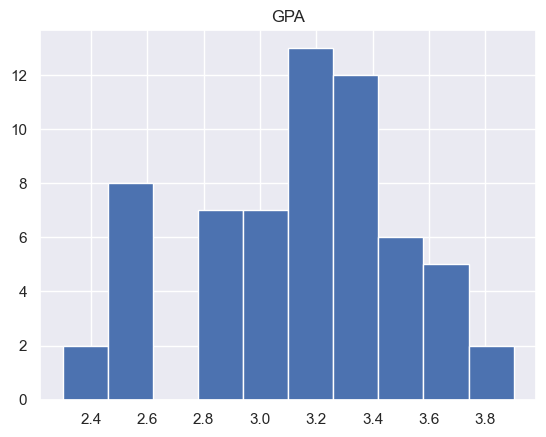

In [84]:
survey_gpa.hist();

In [85]:
survey_sal = survey_data[['Salary']]
survey_sal

,Salary
0,50.0
1,25.0
2,45.0
3,40.0
4,40.0
...,...
57,40.0
58,40.0
59,55.0
60,30.0


In [86]:
survey_sal.mean()

Salary    48.548387
dtype: float64

In [87]:
survey_sal.mode()

,Salary
0,40.0


In [88]:
survey_sal.median()

Salary    50.0
dtype: float64

In [89]:
survey_sal.std()

Salary    12.080912
dtype: float64

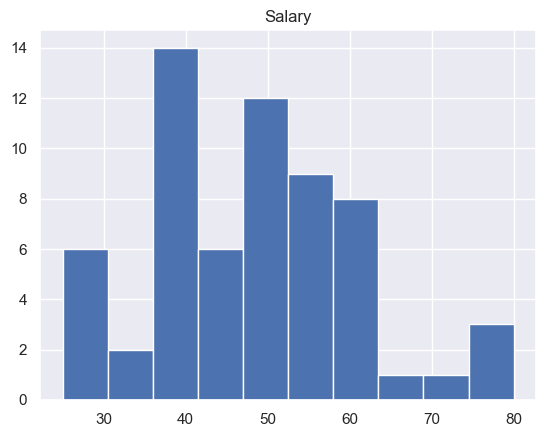

In [90]:
survey_sal.hist();

In [91]:
survey_spen = survey_data[['Spending']]
survey_spen

,Spending
0,350
1,360
2,600
3,600
4,500
...,...
57,1000
58,350
59,500
60,490


In [92]:
survey_spen.mean()

Spending    482.016129
dtype: float64

In [93]:
survey_spen.mode()

,Spending
0,500


In [94]:
survey_spen.median()

Spending    500.0
dtype: float64

In [95]:
survey_spen.std()

Spending    221.953805
dtype: float64

array([[<Axes: title={'center': 'Spending'}>]], dtype=object)

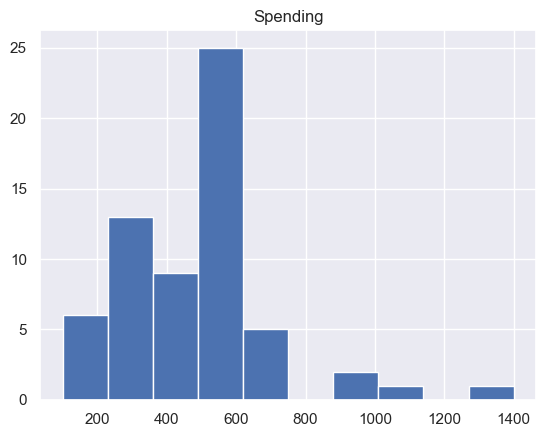

In [96]:
survey_spen.hist()

In [97]:
survey_text = survey_data[['Text Messages']]
survey_text

,Text Messages
0,200
1,50
2,200
3,250
4,100
...,...
57,10
58,250
59,500
60,50


In [98]:
survey_text.mean()

Text Messages    246.209677
dtype: float64

In [99]:
survey_text.mode()

,Text Messages
0,300


In [100]:
survey_text.median()

Text Messages    200.0
dtype: float64

In [101]:
survey_text.std()

Text Messages    214.46595
dtype: float64

array([[<Axes: title={'center': 'Text Messages'}>]], dtype=object)

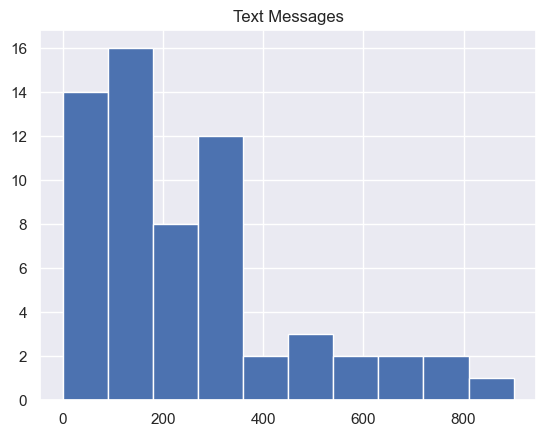

In [102]:
survey_text.hist()

# A & B shingles data

## An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.

In [103]:
from scipy.stats import   ttest_1samp

In [107]:
shing_data = pd.read_csv('A+&+B+shingles.csv')

In [108]:
shing_data.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [109]:
shing_data.shape

(36, 2)

H0 : μ <=0.35

HA: μ > 0.35

# Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps. 

In [110]:
shing_a = shing_data['A']
shing_a

0     0.44
1     0.61
2     0.47
3     0.30
4     0.15
5     0.24
6     0.16
7     0.20
8     0.20
9     0.20
10    0.26
11    0.14
12    0.33
13    0.13
14    0.72
15    0.51
16    0.28
17    0.39
18    0.39
19    0.25
20    0.16
21    0.20
22    0.22
23    0.42
24    0.24
25    0.21
26    0.49
27    0.34
28    0.36
29    0.29
30    0.27
31    0.40
32    0.29
33    0.43
34    0.34
35    0.37
Name: A, dtype: float64

In [111]:
shing_a.isnull().sum()

0

In [112]:
print("The sample size for this problem is",len(shing_a))

The sample size for this problem is 36


In [113]:
 # one sample t-test
# null hypothesis: expected value = 0.35
t_statistic, p_value = ttest_1samp(shing_a, 0.35,nan_policy='omit')
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value))

One sample t test 
t statistic: -1.4735046253382782 p value: 0.14955266289815025 


In [114]:
alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 

print ("Our one-sample t-test p-value=", p_value)

Level of significance: 0.05
We have no evidence to reject the null hypothesis since p value > Level of significance
Our one-sample t-test p-value= 0.14955266289815025


# B

In [115]:
shing_b = shing_data['B']
shing_b

0     0.14
1     0.15
2     0.31
3     0.16
4     0.37
5     0.18
6     0.42
7     0.58
8     0.25
9     0.41
10    0.17
11    0.13
12    0.23
13    0.11
14    0.10
15    0.19
16    0.22
17    0.44
18    0.11
19    0.11
20    0.31
21    0.43
22    0.26
23    0.18
24    0.44
25    0.43
26    0.16
27    0.52
28    0.36
29    0.22
30    0.39
31     NaN
32     NaN
33     NaN
34     NaN
35     NaN
Name: B, dtype: float64

In [116]:
print("The sample size for this problem is",len(shing_b))

The sample size for this problem is 36


In [117]:
 # one sample t-test
# null hypothesis: expected value = 0.35
t_statistic, p_value = ttest_1samp(shing_b, 0.35,nan_policy='omit')
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value))

One sample t test 
t statistic: -3.1003313069986995 p value: 0.004180954800638363 


In [118]:
alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 

print ("Our one-sample t-test p-value=", p_value)

Level of significance: 0.05
We have evidence to reject the null hypothesis since p value < Level of significance
Our one-sample t-test p-value= 0.004180954800638363


# Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed? 

In [119]:
shing_data

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37
5,0.24,0.18
6,0.16,0.42
7,0.20,0.58
8,0.20,0.25
9,0.20,0.41


H0 : μA - μB = 0 i.e μA = μB

HA: μA - μB ≠ 0 i.e μA ≠ μB

In [120]:
t_statistic, p_value  = ttest_ind(shing_data['A'],shing_data['B'], nan_policy='omit')
print('tstat',t_statistic)    
print('P Value',p_value) 

tstat 1.2896282719661123
P Value 0.20174965718353277


In [121]:
# p_value < 0.05 => alternative hypothesis:
# they don't have the same mean at the 5% significance level
print ("two-sample t-test p-value=", p_value)

alpha_level = 0.05

if p_value < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the population means for shingles A and B are not equal.')
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the population means for shingles A and B are equal.')

two-sample t-test p-value= 0.20174965718353277
We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis
We conclude that the population means for shingles A and B are equal.


# END